In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib  # Import matplotlib to access rcParams
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20, 10)


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib  # Import matplotlib to access rcParams
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20, 10)


In [3]:
df1=pd.read_csv("C:\\Users\\Deepa kumari\\Downloads\\Bengaluru_House_Data (1).csv")

df1.head()

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')


In [9]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3=df2.dropna()

In [12]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3.shape

(13246, 5)

In [14]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


C:\Users\Deepa kumari\AppData\Local\Temp\ipykernel_1744\1100308896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [19]:
 df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)  # Try to convert the input to a float
        return True  # If successful, return True
    except:
        return False  # If an exception occurs, return False


In [21]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [22]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [23]:
def convert_sqft_to_num(x):
    token=x.split('_')
    if len(tokens)==2:
        return(float(tokens[0]+float(token[1]))/2)
    try:
        return float(x)
    except:
        return None

In [24]:
def convert_sqft_to_num(x):
    try:
        return float(x)  # Attempt to convert the input to a float
    except:
        return None  # Return None if the conversion fails


In [25]:
print(convert_sqft_to_num('2166'))  # Output: 2166.0
print(convert_sqft_to_num('abc'))   # Output: None
print(convert_sqft_to_num('123.45')) # Output: 123.45


2166.0
None
123.45


In [26]:
convert_sqft_to_num('2100-2850')

In [27]:
import re  # Regular expressions for pattern matching

def convert_sqft_to_num(x):
    try:
        # Extract the numeric part of the string using a regular expression
        numeric_part = re.match(r"[\d\.]+", x)
        if numeric_part:  # If a numeric part is found
            return float(numeric_part.group())
        return None  # If no numeric part is found, return None
    except:
        return None  # Handle unexpected errors gracefully


In [28]:
df4=df3.copy()
df4['toatal_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk,toatal_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0


In [29]:
df4.loc[30]

location         Yelahanka
size                 4 BHK
total_sqft     2100 - 2850
bath                   4.0
price                186.0
bhk                      4
toatal_sqft         2100.0
Name: 30, dtype: object

In [30]:
(2100+2850)/2

2475.0

In [31]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk,toatal_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0


In [32]:
df5=df4.copy()

In [33]:
print(df5[['price', 'total_sqft']].isnull().sum())



price         0
total_sqft    0
dtype: int64


In [34]:
df5 = df5.dropna(subset=['price', 'total_sqft'])


In [35]:
df5['total_sqft'] = df5['total_sqft'].apply(convert_sqft_to_num)


In [36]:
df5 = df5[df5['total_sqft'] > 0]


In [37]:
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']


In [38]:
df5 = df5.dropna(subset=['price', 'total_sqft'])  # Drop rows with null values
df5 = df5[df5['total_sqft'] > 0]                 # Remove rows with zero square footage


In [39]:
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']


In [40]:
len(df5.location.unique())

1304

In [41]:
df5['location'] = df5['location'].apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count')
print(location_stats)



location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64


In [42]:
df5['location'] = df5['location'].apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [43]:
len(location_stats[location_stats<=10])

1052

In [44]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [45]:
len(df5.location.unique())

1293

In [46]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [47]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,toatal_sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,1200.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,1170.0,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,2732.0,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,3300.0,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,1310.0,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,1020.0,36274.509804


In [48]:
600/6

100.0

In [49]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,toatal_sqft,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,500.0,20000.000000


In [50]:
df5.shape

(13246, 8)

In [51]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12462, 8)

In [52]:
df6.price_per_sqft.describe()

count     12462.000000
mean       6314.602037
std        4167.851306
min         267.829813
25%        4215.474643
50%        5299.842271
75%        6922.910519
max      176470.588235
Name: price_per_sqft, dtype: float64

In [53]:
def remove_pps_outlier(df):
    df_out=pd.Dataframe()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduce_df=pd.concat

In [54]:
def remove_pps_outlier(df):
    df_out=pd.Dataframe()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduce_df=subdf[(subdif.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduce_df],ignore_index=True)
        return df_out
    df7=remove_pps_outlier(df6)
    df7.shape

In [100]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.sctter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.sctter(bhk3.total_sqft,bhk2.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.Ylabel("Price ")
    plt.title(location)
    plt.legend()
    plot_scatter_chart(df7,"Hebbal")

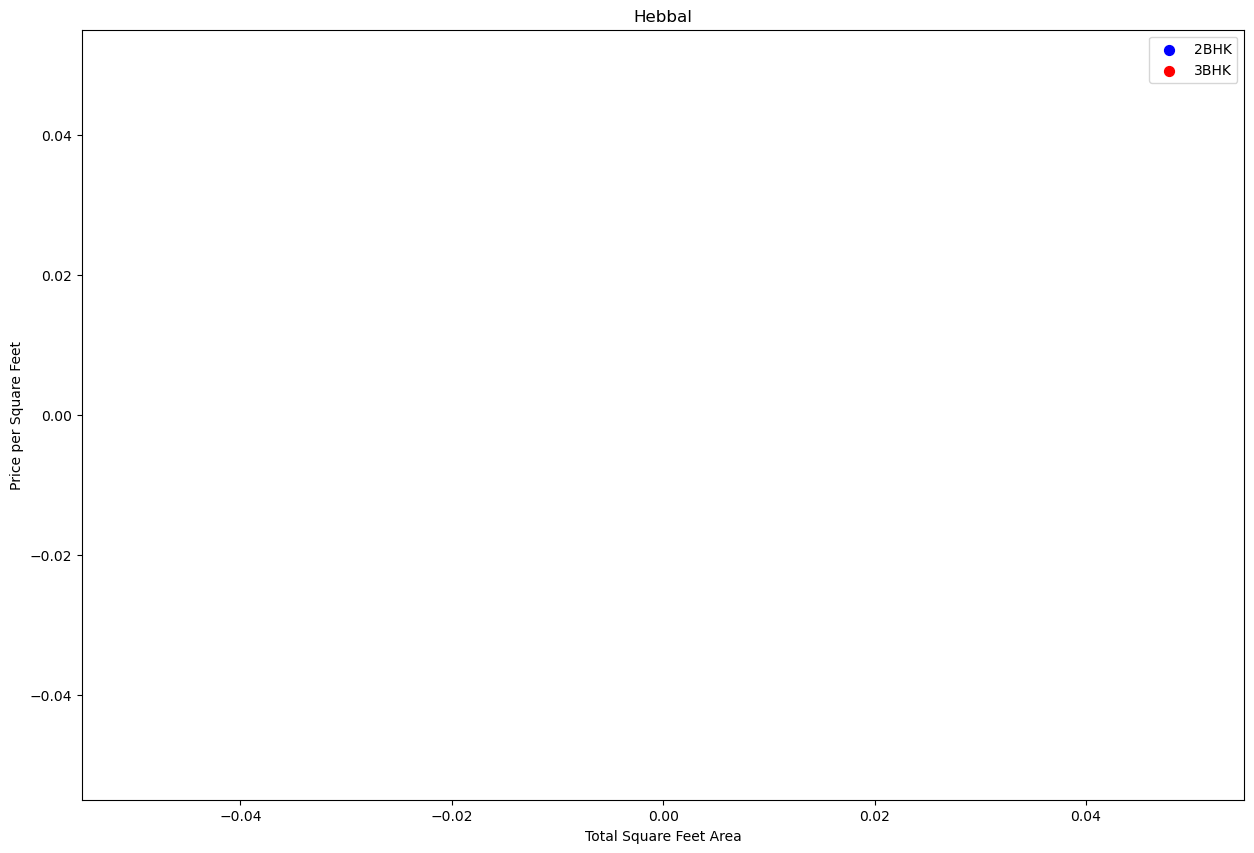

In [109]:
import numpy as np

def remove_bhk_outliers(df):
    exclude_indices = np.array([])  
    bhk_stats = {}  
    
    
    for location, location_df in df.groupby('location'):
        
       
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

    
            stats = bhk_stats.get(bhk - 1)
            
            if stats and stats['count'] > 5:
            
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    
  
    return df.drop(exclude_indices, axis='index')


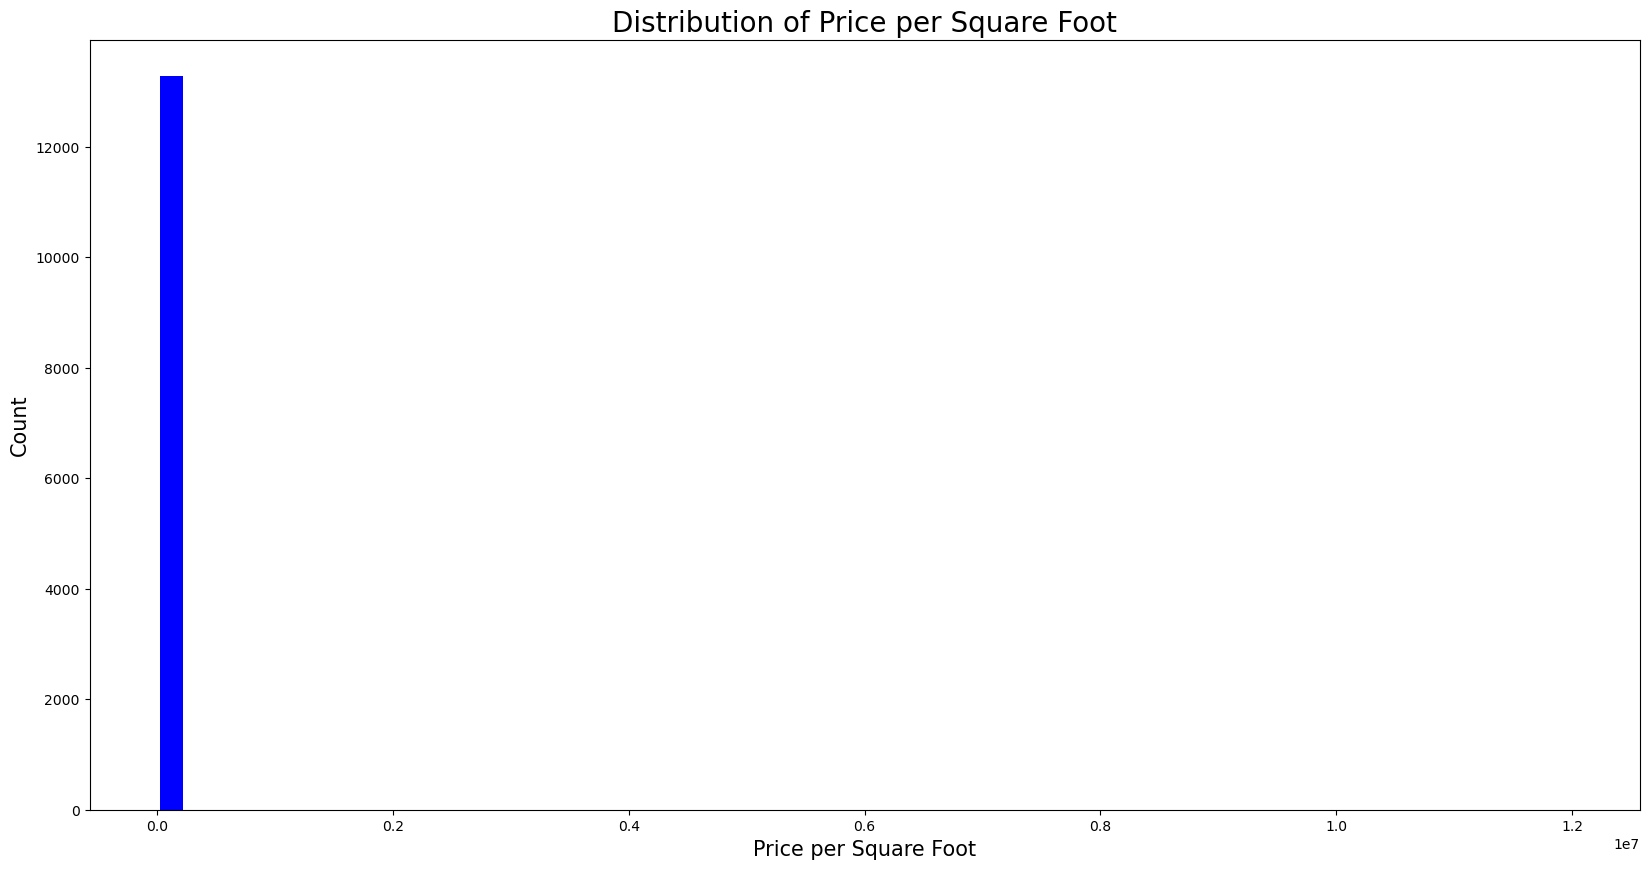

In [60]:

matplotlib.rcParams["figure.figsize"] = (20, 10)  # Set the figure size
plt.hist(df8['price_per_sqft'], bins=50, rwidth=0.8, color='blue')  # Create a histogram
plt.xlabel("Price per Square Foot", fontsize=15)  # Label the x-axis
plt.ylabel("Count", fontsize=15)  # Label the y-axis
plt.title("Distribution of Price per Square Foot", fontsize=20)  # Add a title
plt.show()  # Display the plot


              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


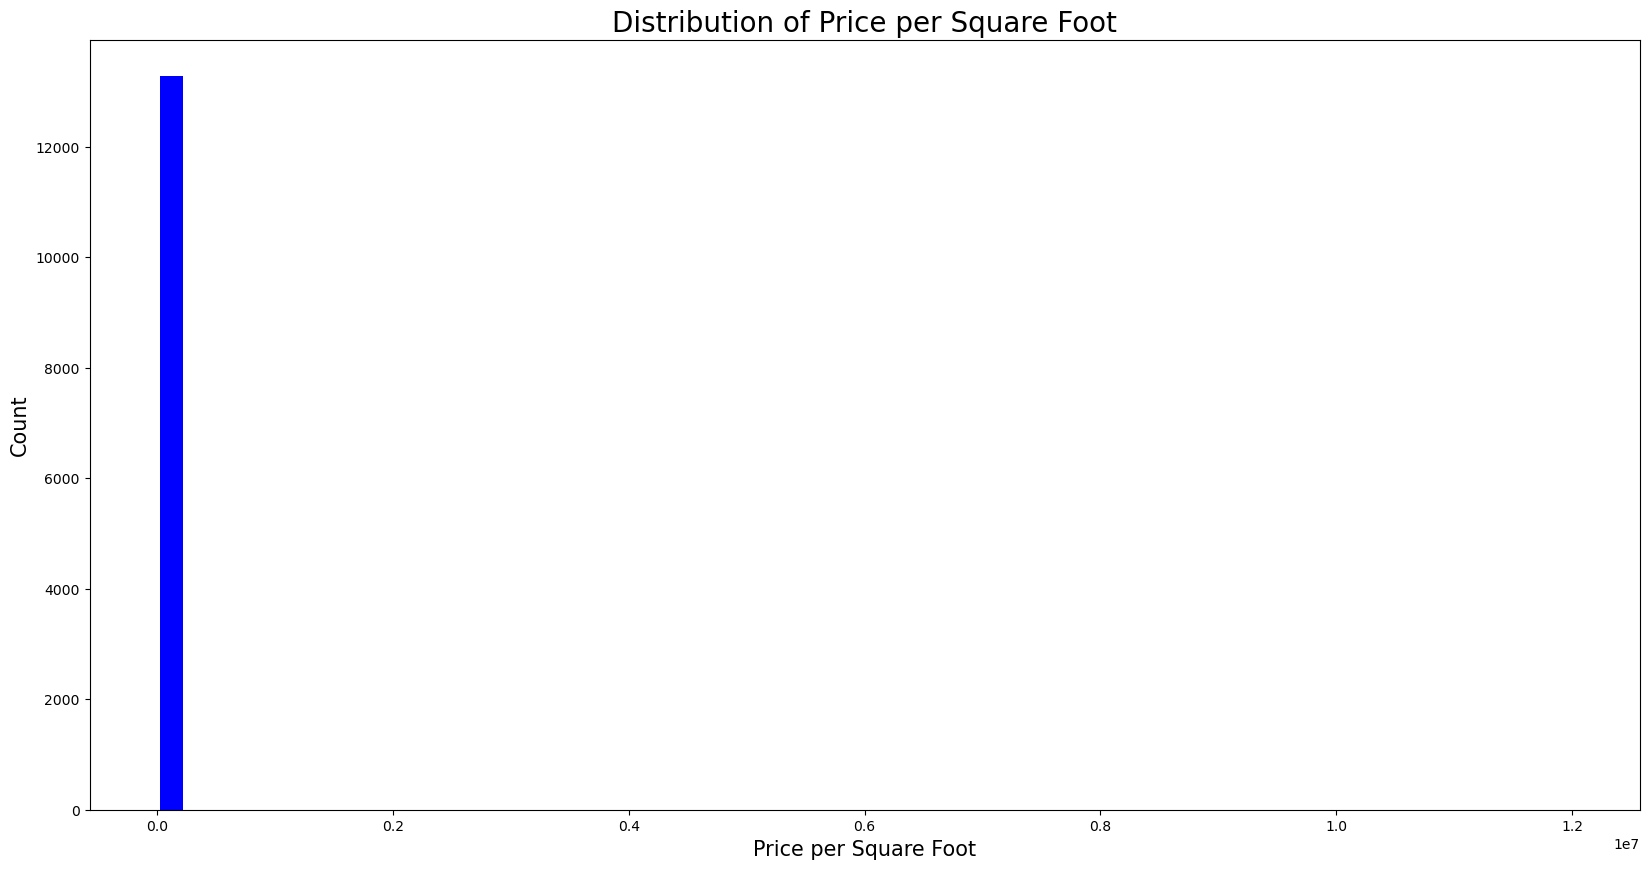

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Load the dataset
df = pd.read_csv("C:\\Users\\Deepa kumari\\Downloads\\Bengaluru_House_Data (1).csv")

# Inspect the dataset structure
print(df.head())

# Clean the 'total_sqft' column: Remove non-numeric values and calculate 'price_per_sqft'
def convert_to_numeric(val):
    try:
        # Some entries may be ranges like "1200-1500"; take the average in such cases
        if '-' in str(val):
            vals = val.split('-')
            return (float(vals[0]) + float(vals[1])) / 2
        return float(val)
    except:
        return None  # Return None for invalid entries

# Apply the conversion function to 'total_sqft'
df['total_sqft'] = df['total_sqft'].apply(convert_to_numeric)

# Drop rows where 'total_sqft' or 'price' is invalid (NaN or <= 0)
df = df[df['total_sqft'].notnull()]
df = df[df['total_sqft'] > 0]
df = df[df['price'] > 0]

# Calculate 'price_per_sqft' (price is assumed to be in lakhs)
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']

# Drop rows where 'price_per_sqft' is invalid
df = df[df['price_per_sqft'].notnull()]
df = df[df['price_per_sqft'] > 0]

# Assign to df8 for consistenc
df8 = df

# Plot the histogram
matplotlib.rcParams["figure.figsize"] = (20, 10)  # Set the figure size
plt.hist(df8['price_per_sqft'], bins=50, rwidth=0.8, color='blue')  # Create a histogram
plt.xlabel("Price per Square Foot", fontsize=15)  # Label the x-axis
plt.ylabel("Count", fontsize=15)  # Label the y-axis
plt.title("Distribution of Price per Square Foot", fontsize=20)  # Add a title
plt.show()  # Display the plot



In [61]:
df8.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [62]:
df8[df8.bath>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
938,Plot Area,Ready To Move,5th Phase JP Nagar,9 Bedroom,NaN,1260.0,11.0,NaN,290.0,23015.873016
1078,Plot Area,Ready To Move,BTM 1st Stage,9 Bedroom,Srvasks,3300.0,14.0,NaN,500.0,15151.515152
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,NaN,8000.0,27.0,0.0,230.0,2875.000000
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,11 Bedroom,NaN,1200.0,11.0,0.0,170.0,14166.666667
1953,Plot Area,Ready To Move,KR Puram,8 Bedroom,NaN,1200.0,12.0,NaN,110.0,9166.666667
1979,Plot Area,Ready To Move,Hongasandra,8 Bedroom,NaN,990.0,12.0,0.0,120.0,12121.212121
3096,Super built-up Area,Ready To Move,Jp nagar 8th Phase .,10 BHK,NaN,12000.0,12.0,NaN,525.0,4375.000000
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19 BHK,NaN,2000.0,16.0,NaN,490.0,24500.000000
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16 BHK,NaN,10000.0,16.0,NaN,550.0,5500.000000
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,NaN,2400.0,40.0,0.0,660.0,27500.000000


Text(0, 0.5, 'Count')

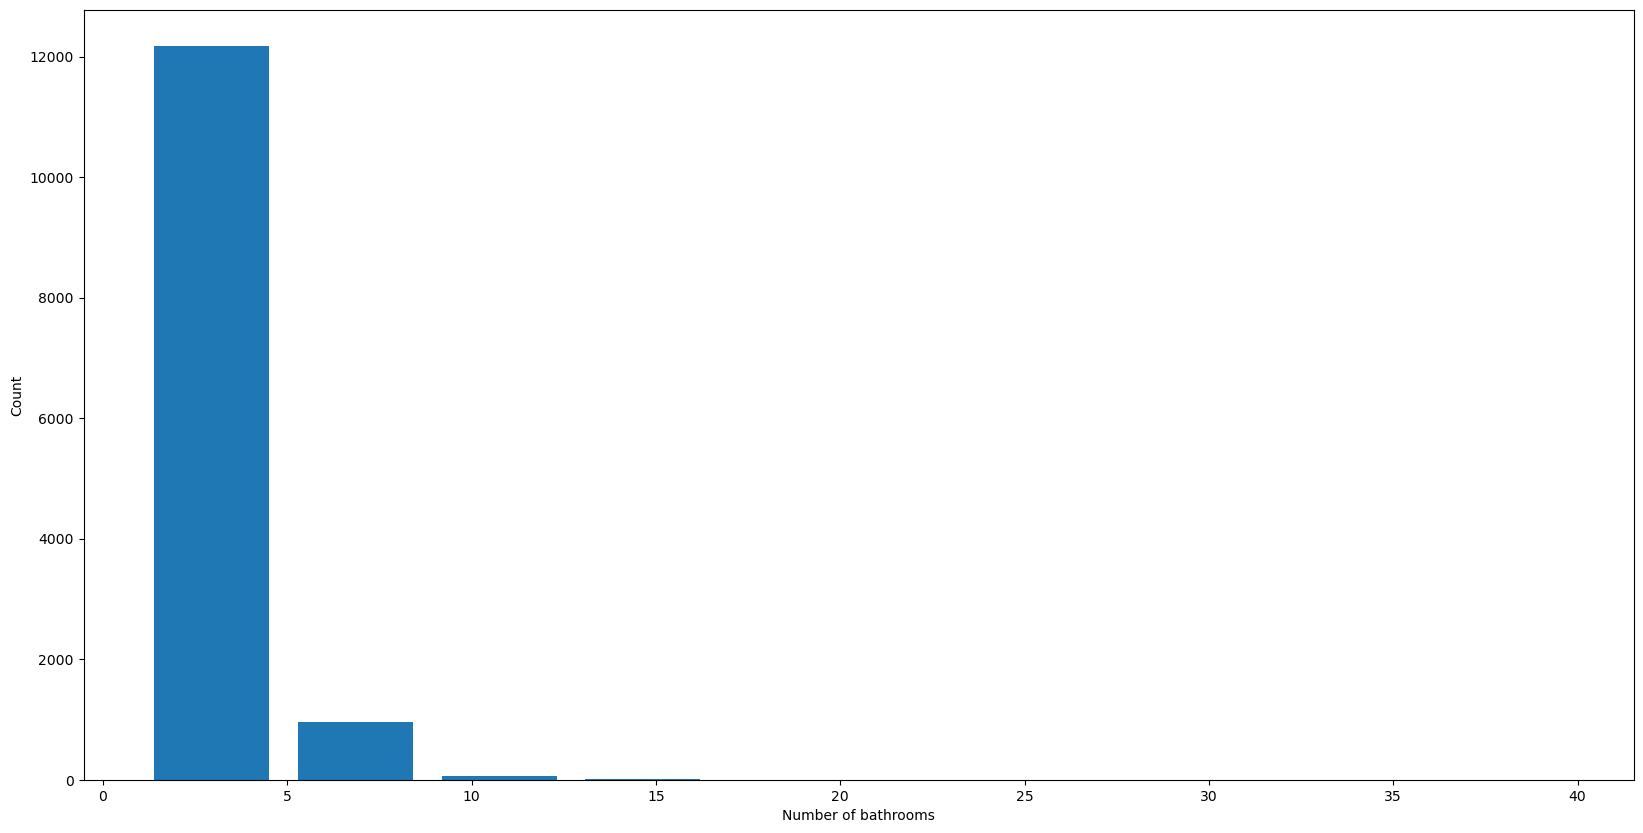

In [63]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [67]:
unusual_bathrooms = df8[df8['bath'] > df8['bhk'] + 2]

In [66]:
df8[df8.bath>df8.bhk+2]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
1078,Plot Area,Ready To Move,BTM 1st Stage,9 Bedroom,Srvasks,3300,14.0,NaN,500.0,9
1953,Plot Area,Ready To Move,KR Puram,8 Bedroom,NaN,1200,12.0,NaN,110.0,8
1979,Plot Area,Ready To Move,Hongasandra,8 Bedroom,NaN,990,12.0,0.0,120.0,8
2620,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,Prowshi,11338,9.0,1.0,1000.0,6
6838,Super built-up Area,19-Jan,Rajaji Nagar,5 BHK,NaN,7500,8.0,3.0,1700.0,5
6937,Plot Area,Ready To Move,5th Block Hbr Layout,9 Bedroom,NaN,2600,12.0,NaN,675.0,9
7709,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,NaN,2460,7.0,2.0,80.0,4
8106,Plot Area,Ready To Move,Wilson Garden,8 Bedroom,NaN,1850,12.0,NaN,300.0,8
9974,Plot Area,Ready To Move,Sector 1 HSR Layout,3 Bedroom,NaN,2400,6.0,2.0,775.0,3
9990,Plot Area,Ready To Move,Doddakannelli,6 Bedroom,NaN,1200,9.0,3.0,122.0,6


In [74]:
# Check column names in df9
print("Columns in df9:", df9.columns)

# Drop columns if they exist
columns_to_drop = [col for col in ['size', 'price_per_sqft'] if col in df9.columns]
df10 = df9.drop(columns=columns_to_drop, axis='columns')

# Display the first 3 rows
df10.head(3)


Columns in df9: Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'bhk'],
      dtype='object')


,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3


In [75]:
# Check column names in df9
print("Columns in df9:", df9.columns)

# Drop columns if they exist
columns_to_drop = [col for col in ['size', 'price_per_sqft'] if col in df9.columns]
df10 = df9.drop(columns=columns_to_drop, axis='columns')

# Display the first 3 rows
df10.head(3)


Columns in df9: Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'bhk'],
      dtype='object')


,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3


In [76]:
pd.get_dummies(df10.location)

,Anekal,Banaswadi,Basavangudi,Bhoganhalli,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Sector 1 HSR Layout,...,rr nagar,sankeswari,sapthagiri Layout,sarjapura main road,singapura paradise,t.c palya,tc.palya,vinayakanagar,"white field,kadugodi",whitefiled
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
dummies = pd.get_dummies(df10['location'])  # Generate dummy variables for the 'location' column
dummies.head(3)  # Display the first 3 rows of the dummy variables


,Anekal,Banaswadi,Basavangudi,Bhoganhalli,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Sector 1 HSR Layout,...,rr nagar,sankeswari,sapthagiri Layout,sarjapura main road,singapura paradise,t.c palya,tc.palya,vinayakanagar,"white field,kadugodi",whitefiled
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
